
# K-Means Clustering

**Overview**<br>
Room Data is a Dataset of designed room spaces for a live project and therefore confidential. The Rows are each Room and features, the given parametrs like location, Front of House, Back Of House, etc

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

### 1. Read and visualise the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = "/content/gdrive/MyDrive/LJMU_MSC_ResearchDataSet/RoomData_20211213.csv"

In [ ]:
Room_df = pd.read_csv(data)

In [ ]:
# # read the dataset
# retail_df = pd.read_csv("Online_Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
Room_df

,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,...,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_ElementId-5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_ElementId-5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,Design Option--1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,Dyn_ElementId-5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,Design Option--1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,...,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_ElementId-5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,Design Option--1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_ElementId-5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,48923.374,38847.220,241100.0,4122,WR,311,Circulation,Workset-44612,Number-4122,Name-WR,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-5887.27091172,Unbounded Height-6989.34620898,Department-Circulation,Dyn_ElementId-10919091,Dyn_FunctionalZone_Name-OFFICES,"Dyn_FunctionalZone_Abb-TG, TG",Element ID-,Design Option--1,Computation Height-150.0
1318,81963.483,77002.285,227700.0,4123,SECURE ROOM,970236,Art Storage,Workset-1206,Number-4123,Name-SECURE ROOM,...,"Upper Limit-Level(Name=B2, Elevation=228200)",Limit Offset-5289.35787557,Unbounded Height-5289.35787557,Department-Art Storage,Dyn_ElementId-7503617,"Dyn_FunctionalZone_Name-STAFF FACILITIES, STAF...","Dyn_FunctionalZone_Abb-SF, SF",Element ID-,Design Option--1,Computation Height-0.0
1319,102877.235,50780.087,227700.0,4124,CIRCULATION SPACE,970236,Art Storage,Workset-1206,Number-4124,Name-CIRCULATION SPACE,...,"Upper Limit-Level(Name=B2, Elevation=228200)",Limit Offset-5284.19970071,Unbounded Height-5284.19970071,Department-Art Storage,Dyn_ElementId-7537295,"Dyn_FunctionalZone_Name-STAFF FACILITIES, STAF...","Dyn_FunctionalZone_Abb-SF, SF",Element ID-,Design Option--1,Computation Height-0.0
1320,105208.885,71535.241,245475.0,4125,STORAGE,969509,BoH,Workset-1206,Number-4125,Name-STORAGE,...,"Upper Limit-Level(Name=01, Elevation=245975)",Limit Offset-3007.84812077,Unbounded Height-3007.84812077,Department-BoH,Dyn_ElementId-8620436,Dyn_FunctionalZone_Name-FOH & PERMENANT GALLER...,"Dyn_FunctionalZone_Abb-PG, PG, EX",Element ID-,Design Option--1,Computation Height-1150.0


In [ ]:
# basics of the df
Room_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               1116 non-null   float64
 1   Y               1116 non-null   float64
 2   Z               1116 non-null   float64
 3   Room_Number     1320 non-null   object 
 4   Room_Name       1322 non-null   object 
 5   Level_Id        1322 non-null   int64  
 6   Department      1322 non-null   object 
 7   Workset         1322 non-null   object 
 8   Room_Number2    1322 non-null   object 
 9   Room_Name2      1322 non-null   object 
 10  Level           1322 non-null   object 
 11  Upper_Limit     1322 non-null   object 
 12  Limit_Offset    1322 non-null   object 
 13  UnboundHeight   1322 non-null   object 
 14  Department2     1322 non-null   object 
 15  Dyn_ElementId   1322 non-null   object 
 16  Dyn_FuncZone    1322 non-null   object 
 17  Dyn_FuncZn_Abb  1322 non-null   o

### 2. Clean the data

In [ ]:
# missing values
round(100*(Room_df.isnull().sum())/len(Room_df), 2)

X                 15.58
Y                 15.58
Z                 15.58
Room_Number        0.15
Room_Name          0.00
Level_Id           0.00
Department         0.00
Workset            0.00
Room_Number2       0.00
Room_Name2         0.00
Level              0.00
Upper_Limit        0.00
Limit_Offset       0.00
UnboundHeight      0.00
Department2        0.00
Dyn_ElementId      0.00
Dyn_FuncZone       0.00
Dyn_FuncZn_Abb     0.00
Element ID         0.00
DesignOption       0.00
CompHt             0.00
dtype: float64

###### Drop rows for rooms not located

In [ ]:
# drop all rows having missing values
Room_df = Room_df.dropna(subset=["X","Y","Z"])
Room_df.shape

(1116, 21)

In [ ]:
Room_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1321
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               1116 non-null   float64
 1   Y               1116 non-null   float64
 2   Z               1116 non-null   float64
 3   Room_Number     1114 non-null   object 
 4   Room_Name       1116 non-null   object 
 5   Level_Id        1116 non-null   int64  
 6   Department      1116 non-null   object 
 7   Workset         1116 non-null   object 
 8   Room_Number2    1116 non-null   object 
 9   Room_Name2      1116 non-null   object 
 10  Level           1116 non-null   object 
 11  Upper_Limit     1116 non-null   object 
 12  Limit_Offset    1116 non-null   object 
 13  UnboundHeight   1116 non-null   object 
 14  Department2     1116 non-null   object 
 15  Dyn_ElementId   1116 non-null   object 
 16  Dyn_FuncZone    1116 non-null   object 
 17  Dyn_FuncZn_Abb  1116 non-null   o

In [ ]:
Room_df.head()

,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,...,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_ElementId-5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_ElementId-5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,Design Option--1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,Dyn_ElementId-5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,Design Option--1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,...,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_ElementId-5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,Design Option--1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_ElementId-5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0


In [ ]:
df = Room_df.copy

In [ ]:
# df.Name.apply(lambda x: pd.Series(str(x).split("_")))

In [ ]:
# new column: DesignOption_Split 
Room_df.DesignOption = Room_df.DesignOption.apply(lambda x : pd.Series(str(x).split("--")[-1]))
# Room_df.DesignOption = Room_df.DesignOption[-1][len(Room_df.DesignOption)!=0]
Room_df.head()

,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,Level,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_ElementId-5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_ElementId-5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,Level-B1,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,Dyn_ElementId-5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,Level-Lower GF,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_ElementId-5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,Level-GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_ElementId-5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0


In [ ]:
# # new column: DesignOption_Split 
# Room_df.DesignOption = Room_df.DesignOption.str.split("--")
# # Room_df.DesignOption = Room_df.DesignOption[-1][len(Room_df.DesignOption)!=0]
# Room_df.head()

In [ ]:
Room_df.DesignOption

0       1
1       1
2       1
3       1
4       1
       ..
1317    1
1318    1
1319    1
1320    1
1321    1
Name: DesignOption, Length: 1114, dtype: object

In [ ]:
Room_df = Room_df[Room_df.DesignOption=="1"]
Room_df.head()

,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,Level,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_ElementId-5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_ElementId-5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,Level-B1,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,Dyn_ElementId-5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,Level-Lower GF,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_ElementId-5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,Level-GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_ElementId-5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0


In [ ]:
Room_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1321
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               1094 non-null   float64
 1   Y               1094 non-null   float64
 2   Z               1094 non-null   float64
 3   Room_Number     1094 non-null   object 
 4   Room_Name       1094 non-null   object 
 5   Level_Id        1094 non-null   int64  
 6   Department      1094 non-null   object 
 7   Workset         1094 non-null   object 
 8   Room_Number2    1094 non-null   object 
 9   Room_Name2      1094 non-null   object 
 10  Level           1094 non-null   object 
 11  Upper_Limit     1094 non-null   object 
 12  Limit_Offset    1094 non-null   object 
 13  UnboundHeight   1094 non-null   object 
 14  Department2     1094 non-null   object 
 15  Dyn_ElementId   1094 non-null   object 
 16  Dyn_FuncZone    1094 non-null   object 
 17  Dyn_FuncZn_Abb  1094 non-null   o

In [ ]:
# new column: DesignOption_Split 
Room_df.Dyn_ElementId = Room_df.Dyn_ElementId.apply(lambda x : pd.Series(str(x).split("-")[-1]))
# Room_df.DesignOption = Room_df.DesignOption[-1][len(Room_df.DesignOption)!=0]
Room_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,Level,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,Level-GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,Level-B1,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,Level-Lower GF,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,Level-GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0


In [ ]:
# new column: DesignOption_Split 
Room_df.Level = Room_df.Level.apply(lambda x : pd.Series(str(x).split("-")[-1]))
# Room_df.DesignOption = Room_df.DesignOption[-1][len(Room_df.DesignOption)!=0]
Room_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,...,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,Dyn_ElementId-5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,...,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,Dyn_ElementId-5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,Design Option--1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,Dyn_ElementId-5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,Design Option--1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,...,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,Dyn_ElementId-5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,Design Option--1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,...,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,Dyn_ElementId-5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,Design Option--1,Computation Height-150.0


#### Number of unique Element IDs

In [ ]:
len(Room_df.Dyn_ElementId.unique())

522

### 3. Prepare the data for modelling


- F (Frequency): Number of Rooms with an ElementID


In [ ]:
# Level
grouped_df_Level = Room_df.groupby('Level')['Room_Number'].count()
grouped_df_Level = grouped_df_Level.reset_index()
grouped_df_Level

,Level,Room_Number
0,01,96
1,02,150
2,03,89
3,Auditorium Balcony,5
4,B1,276
5,B2,170
6,B3,109
7,GF,163
8,Lower GF,54
9,Site Entrance,2


In [ ]:
df_GF = Room_df[Room_df.Level=='GF']
df_GF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 1317
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               143 non-null    float64
 1   Y               143 non-null    float64
 2   Z               143 non-null    float64
 3   Room_Number     143 non-null    object 
 4   Room_Name       143 non-null    object 
 5   Level_Id        143 non-null    int64  
 6   Department      143 non-null    object 
 7   Workset         143 non-null    object 
 8   Room_Number2    143 non-null    object 
 9   Room_Name2      143 non-null    object 
 10  Level           143 non-null    object 
 11  Upper_Limit     143 non-null    object 
 12  Limit_Offset    143 non-null    object 
 13  UnboundHeight   143 non-null    object 
 14  Department2     143 non-null    object 
 15  Dyn_ElementId   143 non-null    object 
 16  Dyn_FuncZone    143 non-null    object 
 17  Dyn_FuncZn_Abb  143 non-null    ob

In [ ]:
# Level
grouped_df_LeveliD = Room_df.groupby('Level_Id')['Room_Number'].count()
grouped_df_LeveliD = grouped_df_LeveliD.reset_index()
grouped_df_LeveliD

,Level_Id,Room_Number
0,311,143
1,694,150
2,419525,276
3,969509,96
4,969879,89
5,970236,170
6,1162183,2
7,1404832,54
8,2293118,5
9,3805556,109


In [ ]:
# Z
grouped_df_Z = Room_df.groupby('Z')['Dyn_ElementId'].count()
grouped_df_Z = grouped_df_Z.reset_index()
grouped_df_Z

,Z,Dyn_ElementId
0,223700.0,109
1,227700.0,170
2,234600.0,276
3,238000.0,54
4,240000.0,2
5,241100.0,143
6,244050.0,5
7,245475.0,96
8,249850.0,150
9,254225.0,89


In [ ]:
grouped_df_Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Z              10 non-null     float64
 1   Dyn_ElementId  10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


In [ ]:
grouped_df_X = Room_df.groupby('X')['Dyn_ElementId'].count()
grouped_df_X = grouped_df_X.reset_index()
grouped_df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              885 non-null    float64
 1   Dyn_ElementId  885 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [ ]:
grouped_df_Y = Room_df.groupby('Y')['Dyn_ElementId'].count()
grouped_df_Y = grouped_df_Y.reset_index()
grouped_df_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Y              828 non-null    float64
 1   Dyn_ElementId  828 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.1 KB


In [ ]:
# frequency
frequency = Room_df.groupby('Dyn_ElementId')['Room_Number'].count()
frequency = frequency.reset_index()
frequency.columns = ['Dyn_ElementId', 'frequency']
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dyn_ElementId  501 non-null    object
 1   frequency      501 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


In [ ]:
frequency.sort_values(by=['frequency'],ascending=False)

,Dyn_ElementId,frequency
0,,342
189,11424334,37
484,8702464,13
35,10475409,9
300,7010203,9
...,...,...
187,11424331,1
186,11412503,1
182,11412463,1
180,11408453,1


In [ ]:
RoomNum_frequency = Room_df.groupby('Room_Number')['Dyn_ElementId'].count()
RoomNum_frequency = RoomNum_frequency.reset_index()
RoomNum_frequency.columns = ['Room_Number', 'frequency']
RoomNum_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Room_Number  1006 non-null   object
 1   frequency    1006 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
RoomNum_frequency.sort_values(by=['frequency'],ascending=False)

,Room_Number,frequency
605,3717,3
781,3955,3
693,3852,3
739,3904,3
603,3715,3
...,...,...
338,3311,1
339,3312,1
340,3314,1
341,3315,1


In [ ]:
Room_df.head()

,X,Y,Z,Room_Number,Room_Name,Level_Id,Department,Workset,Room_Number2,Room_Name2,Level,Upper_Limit,Limit_Offset,UnboundHeight,Department2,Dyn_ElementId,Dyn_FuncZone,Dyn_FuncZn_Abb,Element ID,DesignOption,CompHt
0,126172.044,95910.879,241100.0,1332,TEMPORARY GALLERY 03,311,Galleries,Workset-44612,Number-1332,Name-TEMPORARY GALLERY 03,GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset--246.412767615,Unbounded Height-8503.58723239,Department-Galleries,5062106,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0
1,111528.090,82446.875,241100.0,1340,STAIR D01,311,Circulation,Workset-44612,Number-1340,Name-STAIR D01,GF,"Upper Limit-Level(Name=02, Elevation=250350)",Limit Offset-4603.89818397,Unbounded Height-13353.8981840,Department-Circulation,5062114,Dyn_FunctionalZone_Name-EXTERNAL AREAS,Dyn_FunctionalZone_Abb-EX,Element ID-,1,Computation Height-150.0
2,214932.044,108860.879,234600.0,1360,STAIR E02,419525,Circulation,Workset-44612,Number-1360,Name-STAIR E02,B1,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset--1000.0,Unbounded Height-5500.00000000,Department-Circulation,5062134,"Dyn_FunctionalZone_Name-RESEARCH & EDUCATION, ...","Dyn_FunctionalZone_Abb-RE, RE",Element ID-,1,Computation Height-0.0
3,212515.348,105656.840,238000.0,1363,FIRE LOBBY,1404832,Circulation,Workset-44612,Number-1363,Name-FIRE LOBBY,Lower GF,"Upper Limit-Level(Name=Lower GF, Elevation=238...",Limit Offset-2554.59805884,Unbounded Height-3254.59805884,Department-Circulation,5062137,Dyn_FunctionalZone_Name-STUDIOS,Dyn_FunctionalZone_Abb-ST,Element ID-,1,Computation Height-0.0
4,94932.044,80635.879,241100.0,1371,VESTIBULE,311,Circulation,Workset-44612,Number-1371,Name-VESTIBULE,GF,"Upper Limit-Level(Name=GF, Elevation=241600)",Limit Offset-4246.21202518,Unbounded Height-4246.21202518,Department-Circulation,5062145,Dyn_FunctionalZone_Name-TEMPORARY GALLERIES,Dyn_FunctionalZone_Abb-TG,Element ID-,1,Computation Height-150.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f4893e1a050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4893e12890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4893dfbed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4893e05690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4893e1e890>,
  <matplotlib.lines.Line2D at 0x7f4893e12f90>]}

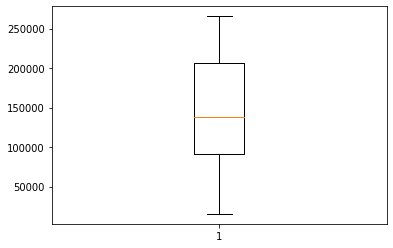

In [ ]:
# 1. outlier treatment
plt.boxplot(Room_df['X'])

In [ ]:
df_Room=Room_df[['Room_Number','X','Y','Z','Level']]
df_Room


,Room_Number,X,Y,Z,Level
0,1332,126172.044,95910.879,241100.0,GF
1,1340,111528.090,82446.875,241100.0,GF
2,1360,214932.044,108860.879,234600.0,B1
3,1363,212515.348,105656.840,238000.0,Lower GF
4,1371,94932.044,80635.879,241100.0,GF
...,...,...,...,...,...
1317,4122,48923.374,38847.220,241100.0,GF
1318,4123,81963.483,77002.285,227700.0,B2
1319,4124,102877.235,50780.087,227700.0,B2
1320,4125,105208.885,71535.241,245475.0,01


In [ ]:
df_Room.Room_Number.astype("string")

0       1332
1       1340
2       1360
3       1363
4       1371
        ... 
1317    4122
1318    4123
1319    4124
1320    4125
1321    4126
Name: Room_Number, Length: 1094, dtype: string

In [ ]:
df_Room.Room_Number = df_Room.Room_Number.astype("string")
df_Room

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Room_Number,X,Y,Z,Level
0,1332,126172.044,95910.879,241100.0,GF
1,1340,111528.090,82446.875,241100.0,GF
2,1360,214932.044,108860.879,234600.0,B1
3,1363,212515.348,105656.840,238000.0,Lower GF
4,1371,94932.044,80635.879,241100.0,GF
...,...,...,...,...,...
1317,4122,48923.374,38847.220,241100.0,GF
1318,4123,81963.483,77002.285,227700.0,B2
1319,4124,102877.235,50780.087,227700.0,B2
1320,4125,105208.885,71535.241,245475.0,01


In [ ]:
# 2. rescaling
df = df_Room[['X','Y','Z']]

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(1094, 3)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['X','Y','Z']
df_scaled.insert(0,'RoomNum',df_Room.Room_Number)
df_scaled.insert(4,'Level',df_Room.Level)
df_scaled.head()

,RoomNum,X,Y,Z,Level
0,1332,-0.257665,0.350687,0.316278,GF
1,1340,-0.482206,0.215106,0.316278,GF
2,1360,1.103326,0.481092,-0.381574,B1
3,1363,1.066270,0.448828,-0.016543,Lower GF
4,1371,-0.736680,0.196870,0.316278,GF


In [ ]:
df_scaled_GF = df_scaled[df_scaled.Level == 'GF']
df_scaled_GF

,RoomNum,X,Y,Z,Level
0,1332,-0.257665,0.350687,0.316278,GF
1,1340,-0.482206,0.215106,0.316278,GF
4,1371,-0.736680,0.196870,0.316278,GF
6,1374,-0.216050,0.200394,0.316278,GF
7,1375,-0.370032,0.218016,0.316278,GF
...,...,...,...,...,...
994,3846,-0.307667,-0.353882,0.785986,GF
995,3846,-0.186106,-0.353882,0.785986,GF
997,3848,0.062303,-0.353882,0.785986,GF
1013,3855,0.551713,0.007060,-0.016543,GF


## 4. Modelling

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled[['X','Y']])

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
# help(KMeans)

In [ ]:
df_scaled.insert(5,'Cluster3',kmeans.labels_)
df_scaled.head()

,RoomNum,X,Y,Z,Level,Cluster3
0,1332,-0.257665,0.350687,0.316278,GF,0
1,1340,-0.482206,0.215106,0.316278,GF,0
2,1360,1.103326,0.481092,-0.381574,B1,2
3,1363,1.066270,0.448828,-0.016543,Lower GF,2
4,1371,-0.736680,0.196870,0.316278,GF,0


In [ ]:
df_scaled[df_scaled.Cluster3 == 2].RoomNum

2       1360
3       1363
5       1373
8       1381
10      <NA>
        ... 
1036    3887
1037    3888
1044    <NA>
1051    3897
1052    3898
Name: RoomNum, Length: 488, dtype: string

In [ ]:
df_scaled[df_scaled.Cluster3 == 1].RoomNum

1058    3904
Name: RoomNum, dtype: string

### Cluster by 10

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=10, max_iter=50)
kmeans.fit(df_scaled[['X','Y','Z']])

KMeans(max_iter=50, n_clusters=10)

In [ ]:
kmeans.labels_

array([6, 6, 7, ..., 8, 0, 0], dtype=int32)

In [ ]:
df_scaled.insert(6,'Cluster10',kmeans.labels_)
df_scaled.head()

,RoomNum,X,Y,Z,Level,Cluster3,Cluster10
0,1332,-0.257665,0.350687,0.316278,GF,0,6
1,1340,-0.482206,0.215106,0.316278,GF,0,6
2,1360,1.103326,0.481092,-0.381574,B1,2,7
3,1363,1.066270,0.448828,-0.016543,Lower GF,2,7
4,1371,-0.736680,0.196870,0.316278,GF,0,6


In [ ]:
df_scaled[df_scaled.Cluster10 == 5].RoomNum

18      1458
22      1477
23      <NA>
24      1487
80      3500
        ... 
1026    3877
1027    3878
1034    3885
1035    <NA>
1051    3897
Name: RoomNum, Length: 114, dtype: string

In [ ]:
# Z
grouped_df_Cluster10 = df_scaled.groupby('Cluster10')['RoomNum'].count()
grouped_df_Cluster10 = grouped_df_Cluster10.reset_index()
grouped_df_Cluster10

,Cluster10,RoomNum
0,0,90
1,1,109
2,2,1
3,3,99
4,4,91
5,5,94
6,6,160
7,7,144
8,8,75
9,9,48


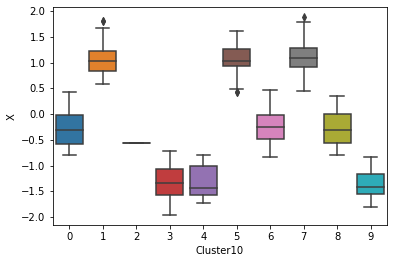

In [ ]:
# plot
sns.boxplot(x='Cluster10', y='X', data=df_scaled)

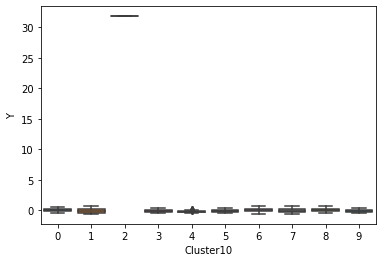

In [ ]:
# plot
sns.boxplot(x='Cluster10', y='Y', data=df_scaled)

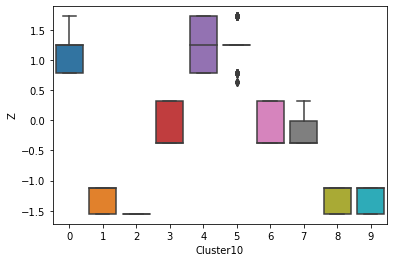

In [ ]:
# plot
sns.boxplot(x='Cluster10', y='Z', data=df_scaled)

#### Finding the Optimal Number of Clusters

##### SSD

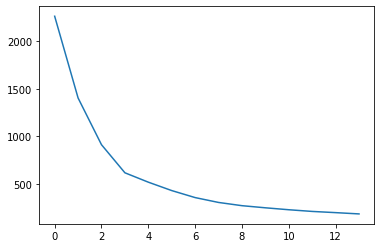

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled[['X','Y','Z']])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

# New Section

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,112,12,13]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled[['X','Y','Z']])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled[['X','Y','Z']], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.9410650420319526
For n_clusters=3, the silhouette score is 0.3541985128063858
For n_clusters=4, the silhouette score is 0.37175582962760106
For n_clusters=5, the silhouette score is 0.3925205115622741
For n_clusters=6, the silhouette score is 0.3816143014355411
For n_clusters=7, the silhouette score is 0.3807573745086951
For n_clusters=8, the silhouette score is 0.39269161087472854
For n_clusters=9, the silhouette score is 0.399529166217074
For n_clusters=10, the silhouette score is 0.40035507647628943
For n_clusters=112, the silhouette score is 0.4581838252158657
For n_clusters=12, the silhouette score is 0.4063751724107114
For n_clusters=13, the silhouette score is 0.38788243323918764


In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled[['X','Y','Z']])

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Z
grouped_df_Cluster4 = df_scaled.groupby('Cluster3')['RoomNum'].count()
grouped_df_Cluster4 = grouped_df_Cluster4.reset_index()
grouped_df_Cluster4

,Cluster3,RoomNum
0,0,511
1,1,1
2,2,399


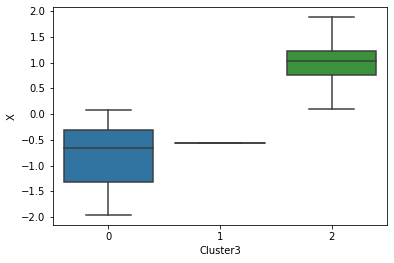

In [ ]:
# plot by X
sns.boxplot(x='Cluster3', y='X', data=df_scaled)

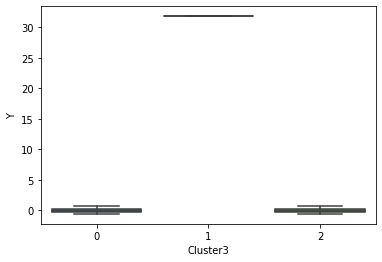

In [ ]:
# plot by Y
sns.boxplot(x='Cluster3', y='Y', data=df_scaled)

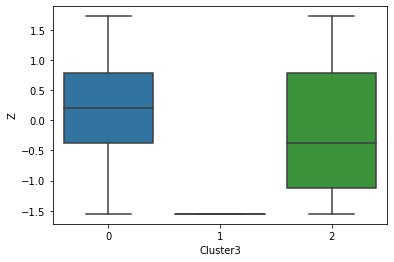

In [ ]:
# plot by Z
sns.boxplot(x='Cluster3', y='Z', data=df_scaled)

#### Hierarchical Clustering

In [ ]:
df_scaled.head()

,RoomNum,X,Y,Z,Level,Cluster3,Cluster10
0,1332,-0.257665,0.350687,0.316278,GF,0,6
1,1340,-0.482206,0.215106,0.316278,GF,0,6
2,1360,1.103326,0.481092,-0.381574,B1,2,7
3,1363,1.066270,0.448828,-0.016543,Lower GF,2,7
4,1371,-0.736680,0.196870,0.316278,GF,0,6


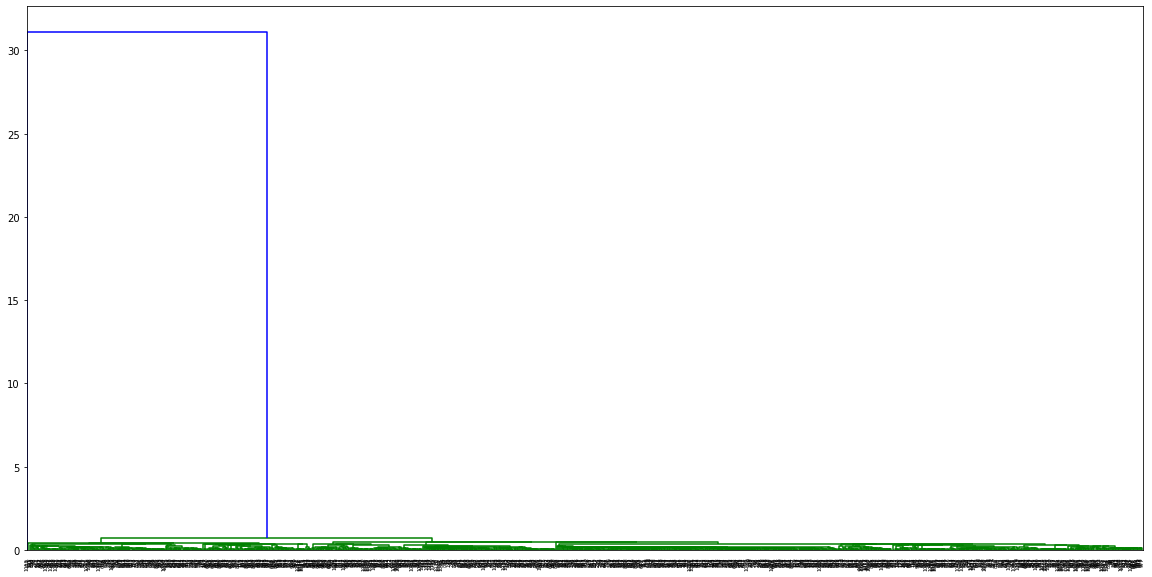

In [ ]:
# single linkage
plt.figure(figsize=(20,10))

mergings = linkage(df_scaled[['X','Y','Z']], method="single", metric='euclidean')
dendrogram(mergings)

plt.xticks(rotation  = 90)
plt.show()

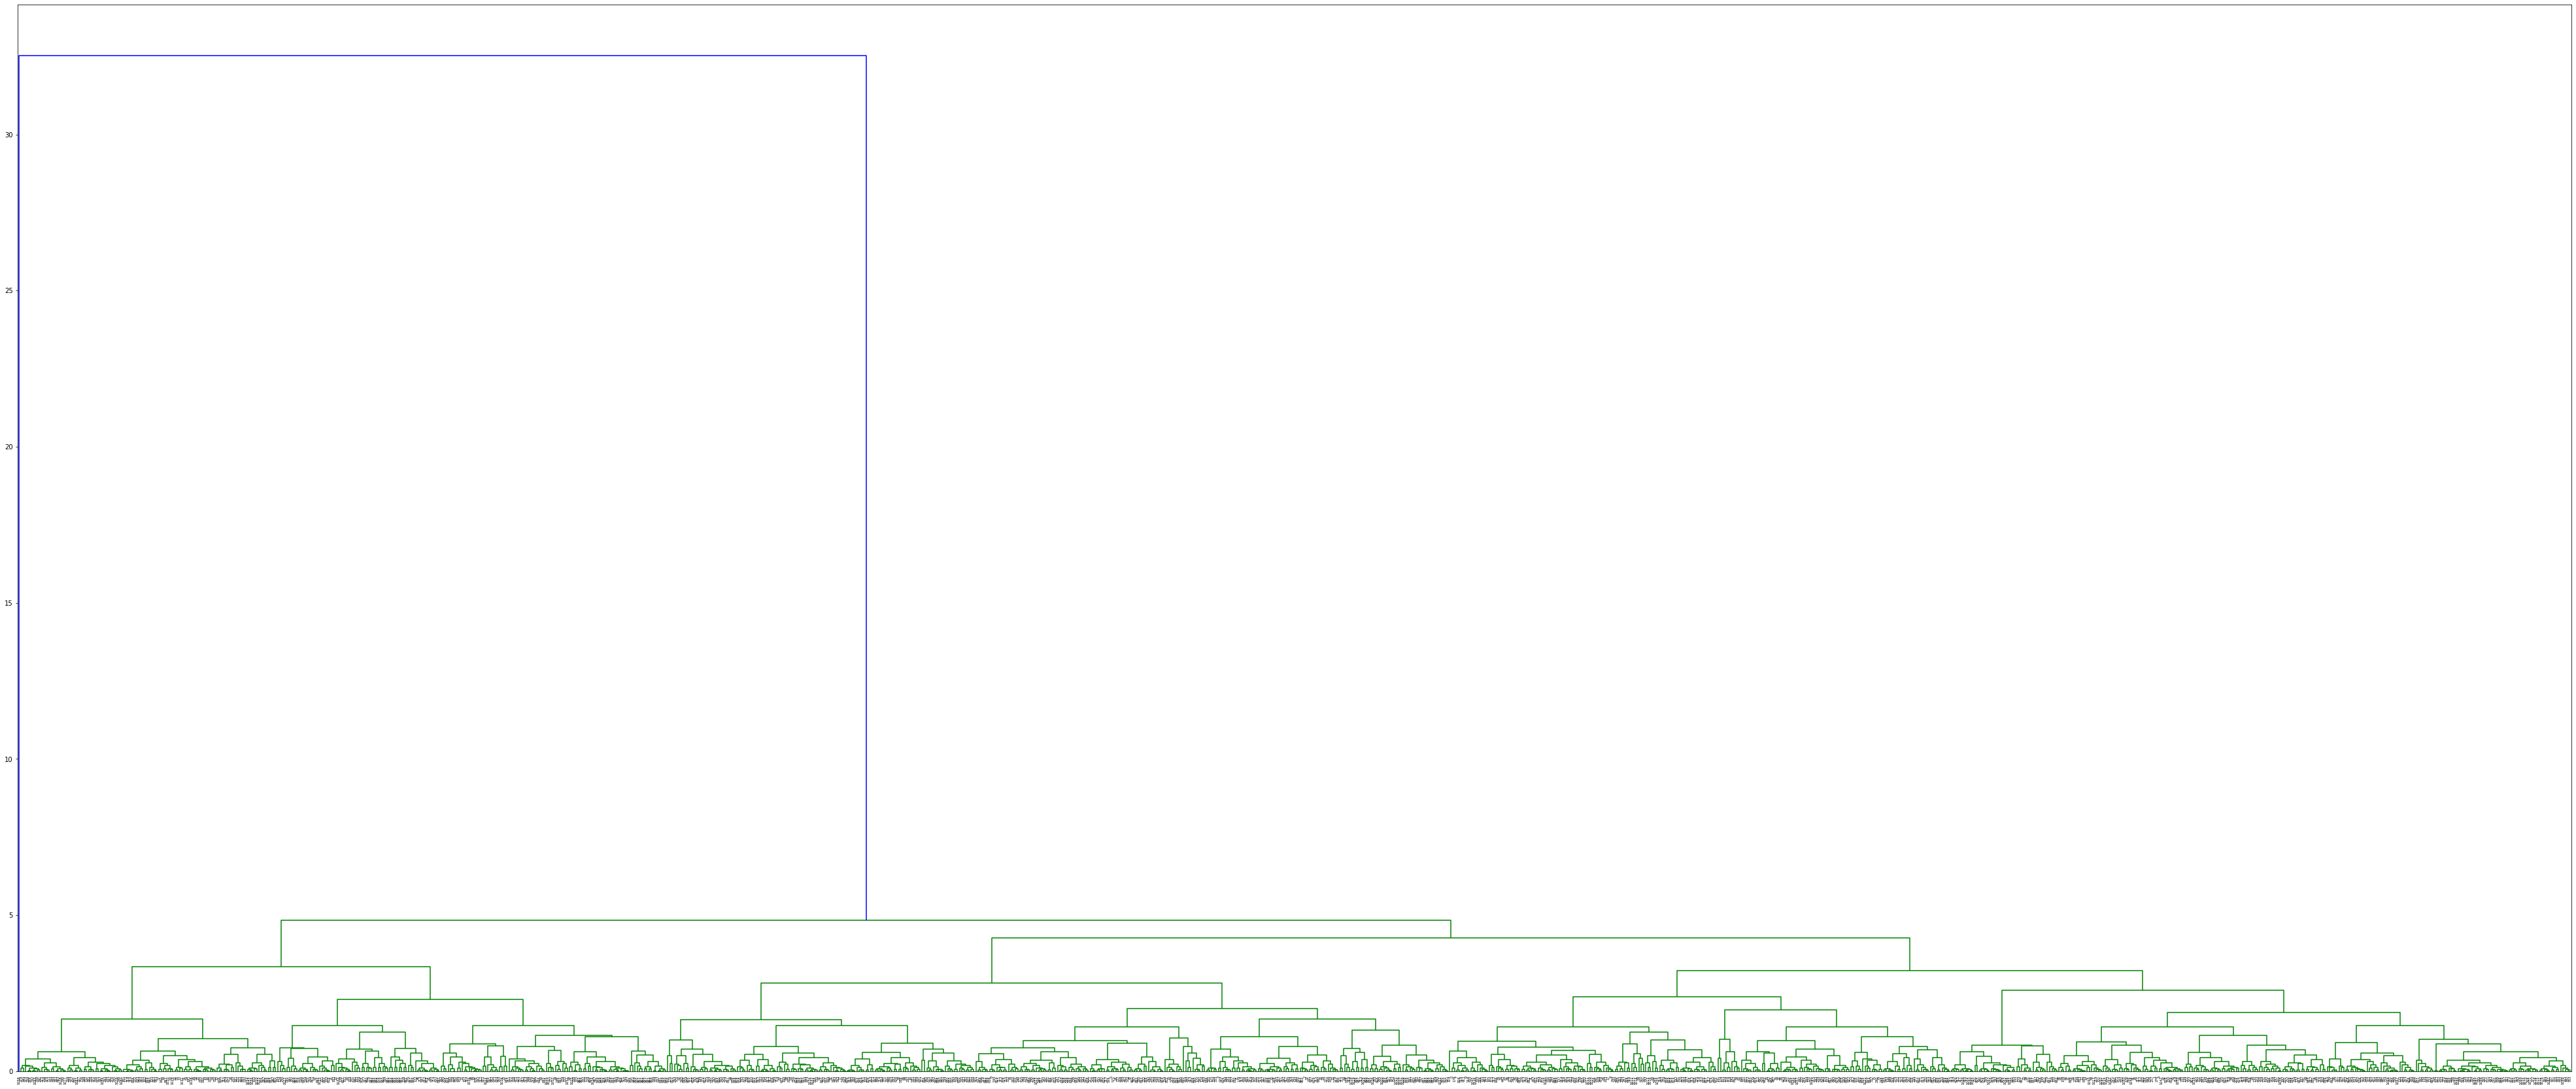

In [ ]:
# complete linkage
plt.figure(figsize=(70,30) )
mergings = linkage(df_scaled[['X','Y','Z']], method="complete", metric='euclidean')
dendrogram(mergings)
plt.xticks(rotation  = 90)
plt.show()

In [ ]:
# 10 clusters
cluster_labels = cut_tree(mergings, n_clusters=10).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 7, 1, 1])

In [ ]:
# assign cluster labels
df_scaled['cluster_labels_N'] = cluster_labels
df_scaled.head()

,RoomNum,X,Y,Z,Level,Cluster3,Cluster10,cluster_labels_N
0,1332,-0.257665,0.350687,0.316278,GF,0,6,0
1,1340,-0.482206,0.215106,0.316278,GF,0,6,1
2,1360,1.103326,0.481092,-0.381574,B1,2,7,2
3,1363,1.066270,0.448828,-0.016543,Lower GF,2,7,2
4,1371,-0.736680,0.196870,0.316278,GF,0,6,1


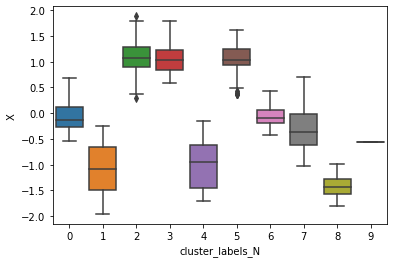

In [ ]:
# plots
sns.boxplot(x='cluster_labels_N', y='X', data=df_scaled)

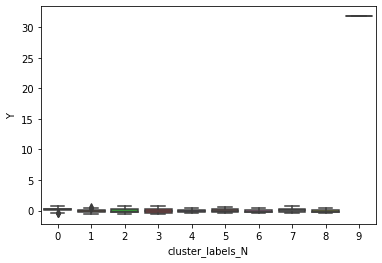

In [ ]:
# plots
sns.boxplot(x='cluster_labels_N', y='Y', data=df_scaled)

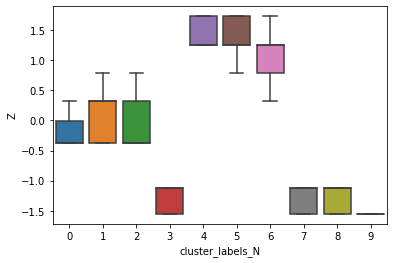

In [ ]:
# plots
sns.boxplot(x='cluster_labels_N', y='Z', data=df_scaled)

### 5. Modeling GF

In [ ]:
df_scaled_GF

,RoomNum,X,Y,Z,Level
0,1332,-0.257665,0.350687,0.316278,GF
1,1340,-0.482206,0.215106,0.316278,GF
4,1371,-0.736680,0.196870,0.316278,GF
6,1374,-0.216050,0.200394,0.316278,GF
7,1375,-0.370032,0.218016,0.316278,GF
...,...,...,...,...,...
994,3846,-0.307667,-0.353882,0.785986,GF
995,3846,-0.186106,-0.353882,0.785986,GF
997,3848,0.062303,-0.353882,0.785986,GF
1013,3855,0.551713,0.007060,-0.016543,GF


In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(df_scaled_GF[['X','Y']])

KMeans(max_iter=50, n_clusters=6)

In [ ]:
kmeans.labels_

array([5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 0, 1, 4, 2, 1, 3, 4, 5, 5, 1, 1, 1,
       2, 1, 1, 1, 1, 5, 5, 5, 2, 2, 4, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 2, 1, 1, 0, 0, 0, 0, 4, 2, 2, 5, 3, 4, 5, 3, 5, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 5, 2, 2, 3, 4, 4, 4, 3, 4, 1, 0, 1, 0, 2,
       1, 2, 4, 1, 5, 2, 2, 2, 4, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       2, 1, 1, 2, 4, 4, 4, 0, 3], dtype=int32)

In [ ]:
df_scaled_GF.insert(5,'Cluster5',kmeans.labels_)


In [ ]:
df_scaled_GF.head()

,RoomNum,X,Y,Z,Level,Cluster5
0,1332,-0.257665,0.350687,0.316278,GF,5
1,1340,-0.482206,0.215106,0.316278,GF,5
4,1371,-0.736680,0.196870,0.316278,GF,1
6,1374,-0.216050,0.200394,0.316278,GF,5
7,1375,-0.370032,0.218016,0.316278,GF,5


In [ ]:
df_scaled_GF[df_scaled_GF.Cluster5 == 2].RoomNum

82       2232
217      3513
297      3572
300      3577
421      3625
458      3179
461      2916
557      3302
558      3303
560    13.LGF
562      3308
588      3340
589    10.LGF
590      3342
591      3343
592      3344
595      3346
596      3347
644      3407
698      3489
784      3662
785      3663
786      3665
797      3676
820      3697
822      3699
855      3722
874      3737
889      3755
927      3786
965      3818
Name: RoomNum, dtype: string

In [ ]:
df_scaled_GF[df_scaled_GF.Cluster5 == 1].RoomNum

4        1371
49      9.LGF
50      1.LGF
51     15.LGF
52       1671
53       1677
73       2057
107      1389
148    11.LGF
149      2958
191      3507
218      3588
219      3143
220      3144
221      3146
328      2799
422      3627
423      3630
617      3371
633      3395
697      3487
749      3612
796      3675
828      3701
829      3702
830      3704
932      3793
953      3814
Name: RoomNum, dtype: string

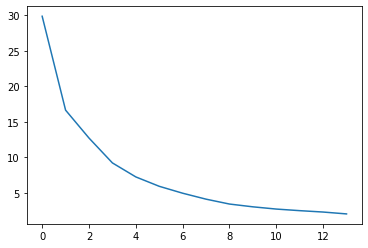

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled_GF[['X','Y']])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,112,12,13]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled_GF[['X','Y']])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_GF[['X','Y']], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6284347407028719
For n_clusters=3, the silhouette score is 0.5301173100411657
For n_clusters=4, the silhouette score is 0.48102125101189985
For n_clusters=5, the silhouette score is 0.46778556150278733
For n_clusters=6, the silhouette score is 0.49957460541118204
For n_clusters=7, the silhouette score is 0.5020475957340604
For n_clusters=8, the silhouette score is 0.5034735457396031
For n_clusters=9, the silhouette score is 0.4767460699221655
For n_clusters=10, the silhouette score is 0.5187749202497014
For n_clusters=112, the silhouette score is 0.09838510613257986
For n_clusters=12, the silhouette score is 0.4817203866255958
For n_clusters=13, the silhouette score is 0.49831310614259133


## Hierarchical Clustering

In [ ]:
df_scaled_GF.head()

,RoomNum,X,Y,Z,Level,Cluster5
0,1332,-0.257665,0.350687,0.316278,GF,5
1,1340,-0.482206,0.215106,0.316278,GF,5
4,1371,-0.736680,0.196870,0.316278,GF,1
6,1374,-0.216050,0.200394,0.316278,GF,5
7,1375,-0.370032,0.218016,0.316278,GF,5


In [ ]:
df_scaled_GF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RoomNum   119 non-null    string 
 1   X         119 non-null    float64
 2   Y         119 non-null    float64
 3   Z         119 non-null    float64
 4   Level     119 non-null    object 
 5   Cluster5  119 non-null    int32  
dtypes: float64(3), int32(1), object(1), string(1)
memory usage: 6.0+ KB


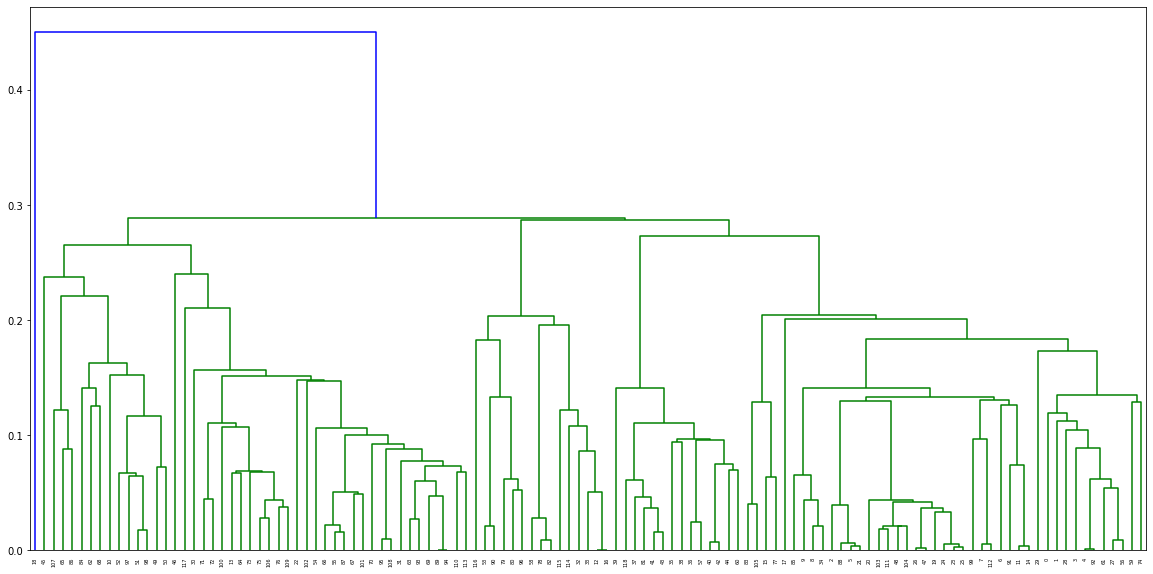

In [ ]:
# single linkage
plt.figure(figsize=(20,10))

mergings = linkage(df_scaled_GF[['X','Y']], method="single", metric='euclidean')
dendrogram(mergings)

plt.xticks(rotation  = 90)
plt.show()

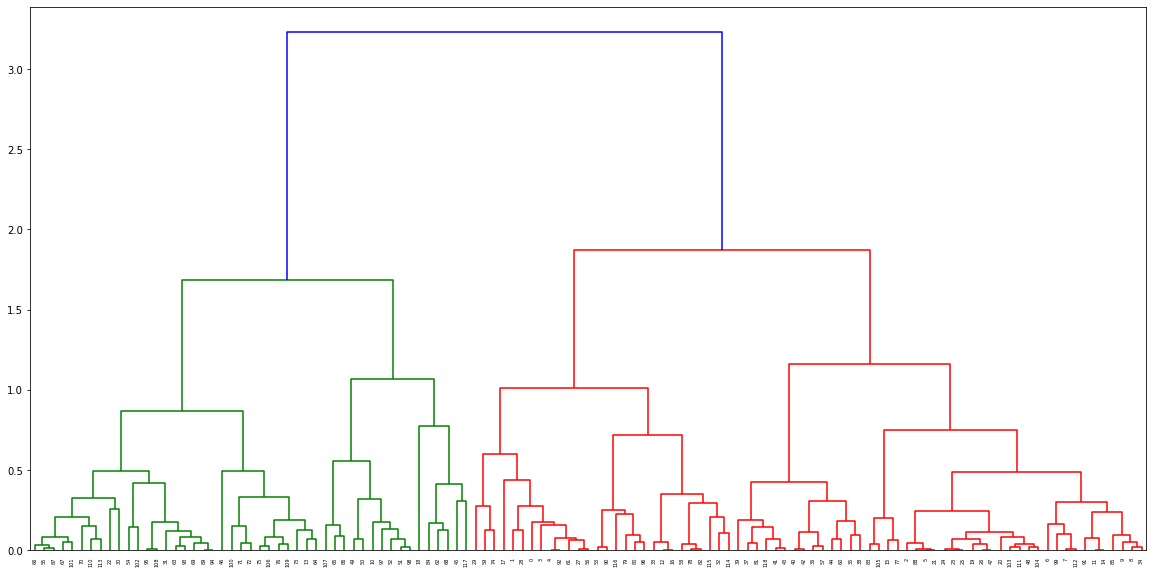

In [ ]:
# complete linkage
plt.figure(figsize=(20,10))
mergings = linkage(df_scaled_GF[['X','Y']], method="complete", metric='euclidean')
dendrogram(mergings)


plt.xticks(rotation  = 90)
plt.show()


In [ ]:
mergings.labels()

AttributeError: ignored

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 3, 1, 1, 0, 0, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 1, 0, 0, 1, 0, 2, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 3,
       1, 3, 0, 1, 0, 3, 3, 3, 0, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3,
       3, 1, 1, 3, 0, 0, 0, 2, 1])

In [ ]:
# assign cluster labels
df_scaled_GF['cluster_labels4'] = cluster_labels
df_scaled_GF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RoomNum,X,Y,Z,Level,Cluster5,cluster_labels4
0,1332,-0.257665,0.350687,0.316278,GF,5,6
1,1340,-0.482206,0.215106,0.316278,GF,5,6
4,1371,-0.736680,0.196870,0.316278,GF,1,2
6,1374,-0.216050,0.200394,0.316278,GF,5,6
7,1375,-0.370032,0.218016,0.316278,GF,5,6


In [ ]:
# assign Room labels
df_scaled_GF['Room_labels'] = Room_labels
df_scaled_GF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RoomNum,X,Y,Z,Level,Cluster5,cluster_labels4,Room_labels
0,1332,-0.257665,0.350687,0.316278,GF,5,6,0
1,1340,-0.482206,0.215106,0.316278,GF,5,6,1
4,1371,-0.736680,0.196870,0.316278,GF,1,2,2
6,1374,-0.216050,0.200394,0.316278,GF,5,6,3
7,1375,-0.370032,0.218016,0.316278,GF,5,6,4


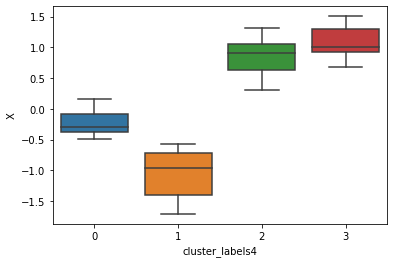

In [ ]:
# plots
sns.boxplot(x='cluster_labels4', y='X', data=df_scaled_GF)

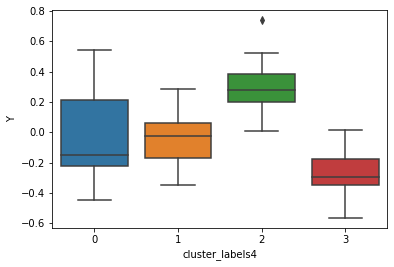

In [ ]:
# plots
sns.boxplot(x='cluster_labels4', y='Y', data=df_scaled_GF)

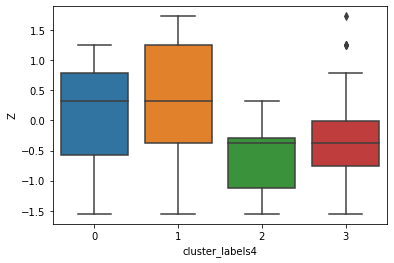

In [ ]:
# plots
sns.boxplot(x='cluster_labels4', y='Z', data=df_scaled_GF)

KeyError: ignored

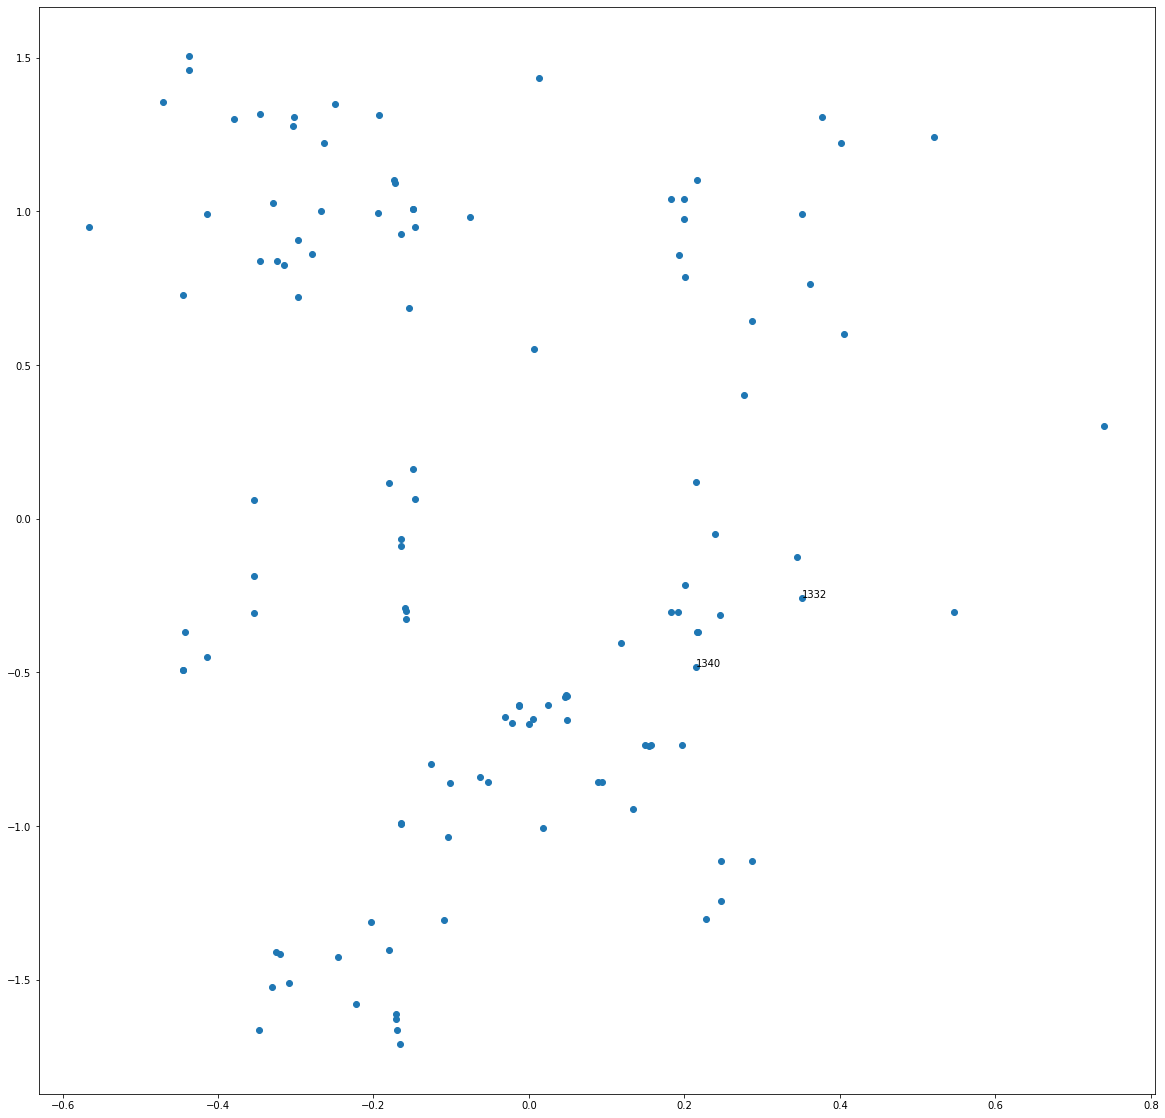

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g0 = df_scaled_GF[df_scaled_GF.cluster_labels4 == 0].RoomNum
g1 = df_scaled_GF[df_scaled_GF.cluster_labels4 == 1].RoomNum
g2 = df_scaled_GF[df_scaled_GF.cluster_labels4 == 2].RoomNum
g3 = df_scaled_GF[df_scaled_GF.cluster_labels4 == 3].RoomNum


data = (g0, g1, g2, g3)
colors = ("yellow","red", "green", "blue")
groups = (0,1,2,3)

y = df_scaled_GF.X
x = df_scaled_GF.Y
n = df_scaled_GF.RoomNum

plt.figure(figsize=(20,20))
plt.scatter(x, y, 
            # hue = df_scaled.Cluster
            )

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

KeyError: ignored

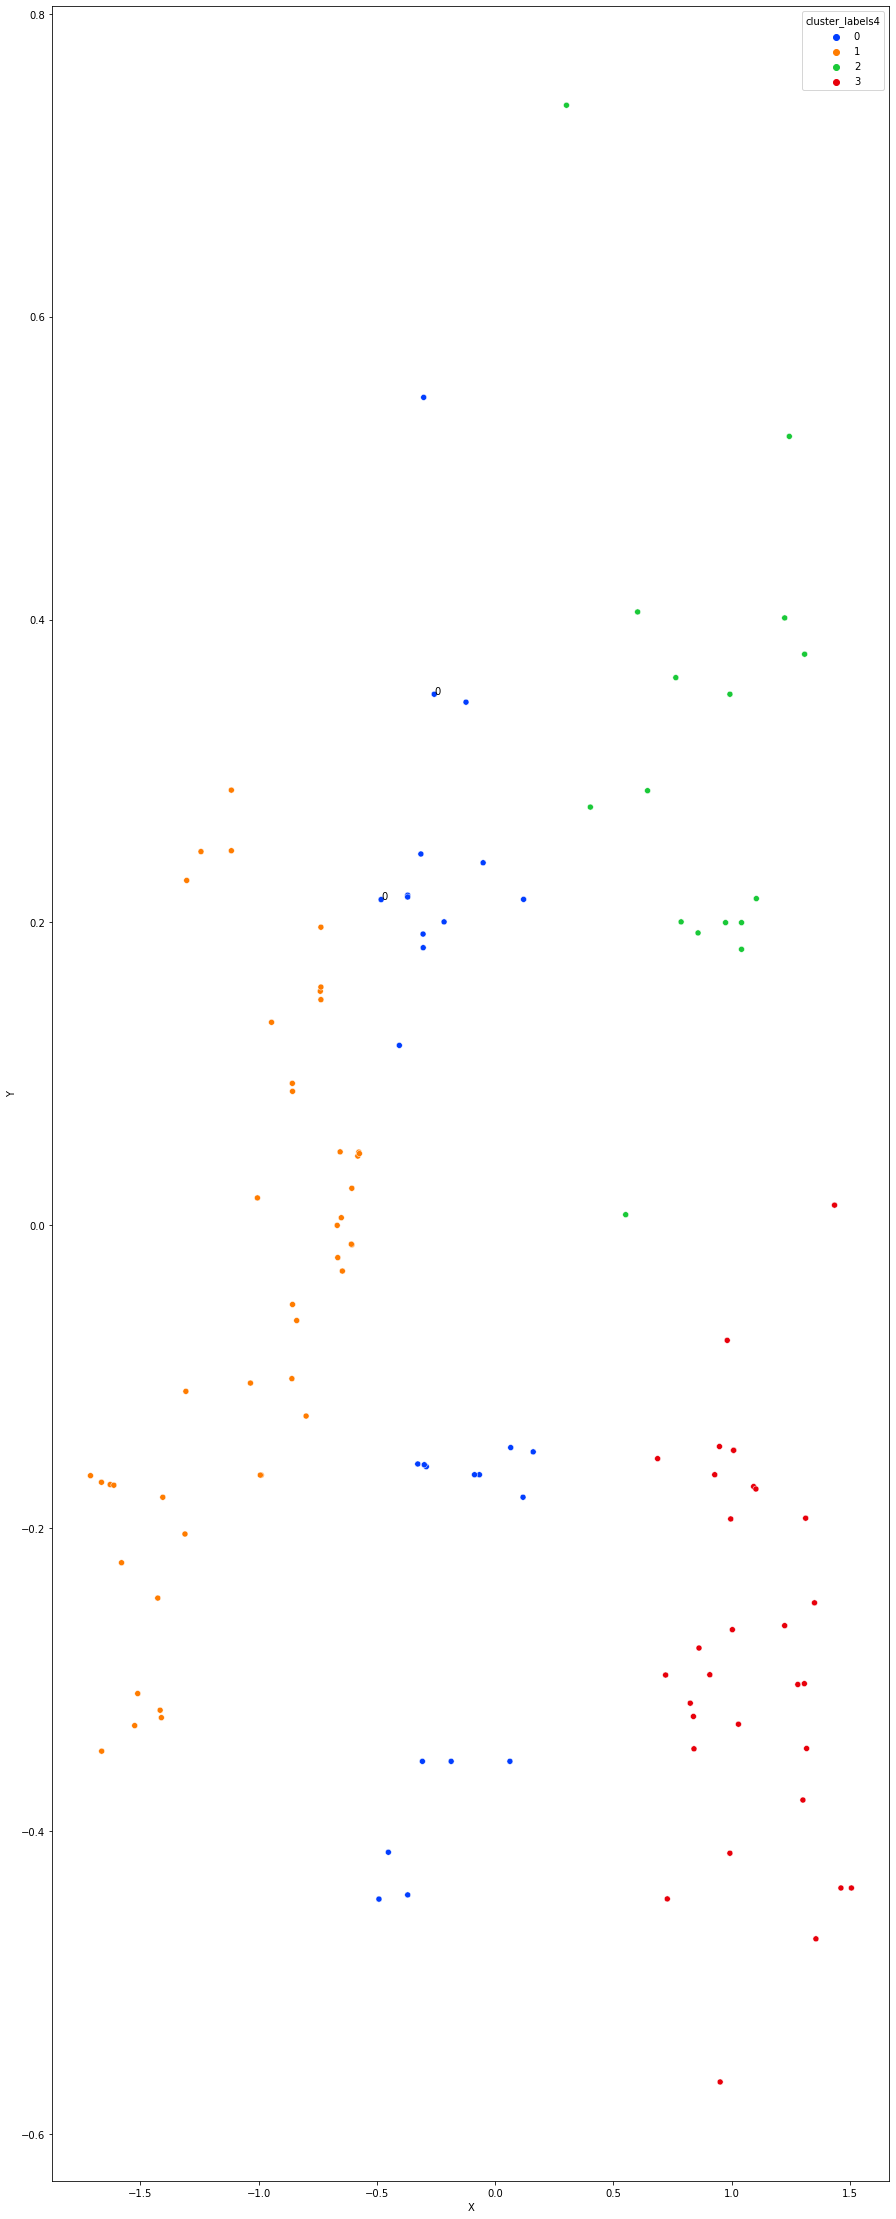

In [ ]:
# https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
plt.figure(figsize=(15,40))
p1 = sns.scatterplot(x="X",
                 y='Y', 
                 hue="cluster_labels4", 
                 data=df_scaled_GF,
                 palette = 'bright')
                #  aspect = 1) 
                # kind='strip')


# add annotations one by one with a loop
for line in range(0,df_scaled_GF.shape[0]):
    p1.text(df_scaled_GF.X[line], 
             df_scaled_GF.Y[line], 
             df_scaled_GF.cluster_labels4[line], 
             horizontalalignment='left', 
             size='medium', 
             color='black' 
            #  weight='semibold'
             )
# https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/


# x = df_scaled.SR
# y = df_scaled.Ave
# n = df_scaled.Player

# for i, txt in enumerate(n):
#     plt.annotate(txt, (x[i], y[i]))

# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

###6. DBSCAN

###  Plotting the Clustering

In [ ]:
import numpy as numpy
import scipy as scipy
from sklearn import cluster
import matplotlib.pyplot as plt
 
 
 
def set2List(NumpyArray):
    list = []
    for item in NumpyArray:
        list.append(item.tolist())
    return list
 
 
def GenerateData():
    x1=numpy.random.randn(50,2)
    x2x=numpy.random.randn(80,1)+12
    x2y=numpy.random.randn(80,1)
    x2=numpy.column_stack((x2x,x2y))
    x3=numpy.random.randn(100,2)+8
    x4=numpy.random.randn(120,2)+15
    z=numpy.concatenate((x1,x2,x3,x4))
    return z
 
 
def DBSCAN(Dataset, Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
#    Dataset is a mxn matrix, m is number of item and n is the dimension of data
    m,n=Dataset.shape
    Visited=numpy.zeros(m,'int')
    Type=numpy.zeros(m)
#   -1 noise, outlier
#    0 border
#    1 core
    ClustersList=[]
    Cluster=[]
    PointClusterNumber=numpy.zeros(m)
    PointClusterNumberIndex=1
    PointNeighbors=[]
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
    for i in xrange(m):
        if Visited[i]==0:
            Visited[i]=1
            PointNeighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            if len(PointNeighbors)<MinumumPoints:
                Type[i]=-1
            else:
                for k in xrange(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
                
                
                PointNeighbors=set2List(PointNeighbors)    
                ExpandClsuter(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1
                 
                    
    return PointClusterNumber 
 
 
 
def ExpandClsuter(PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]
 
    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
#                Neighbors merge with PointNeighbors
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            Cluster.append(i)
            PointClusterNumber[i]=PointClusterNumberIndex
    return
 
#Generating some data with normal distribution at 
#(0,0)
#(8,8)
#(12,0)
#(15,15)
Data=GenerateData()
 
#Adding some noise with uniform distribution
#X between [-3,17],
#Y between [-3,17]
noise=scipy.rand(50,2)*20 -3
 
Noisy_Data=numpy.concatenate((Data,noise))
size=20
 
 
fig = plt.figure()
ax1=fig.add_subplot(2,1,1) #row, column, figure number
ax2 = fig.add_subplot(212)
 
ax1.scatter(Data[:,0],Data[:,1], alpha =  0.5 )
ax1.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
ax2.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
 
 
Epsilon=1
MinumumPoints=20
result =DBSCAN(Data,Epsilon,MinumumPoints)
 
#printed numbers are cluster numbers
print result
#print "Noisy_Data"
#print Noisy_Data.shape
#print Noisy_Data
 
for i in xrange(len(result)):
    ax2.scatter(Noisy_Data[i][0],Noisy_Data[i][1],color='yellow' ,alpha =  0.5)
      
plt.show()